<a href="https://colab.research.google.com/github/biggymart/Group_proj/blob/master/skew_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import cv2

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image file")
args = vars(ap.parse_args())

# load the image from disk
image = cv2.imread(args["image"])

# convert the image to grayscale and flip the foreground
# and background to ensure foreground is now "white" and
# the background is "black"
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]

# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
	angle = -(90 + angle)
    
# otherwise, just take the inverse of the angle to make
# it positive
else:
	angle = -angle
    
# rotate the image to deskew it
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
# draw the correction angle on the image so we can validate it
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
cv2.imshow("Input", image)
cv2.imshow("Rotated", rotated)
cv2.waitKey(0)

아래는 주석 제거하고 argparse 대신 함수화시킨 코드

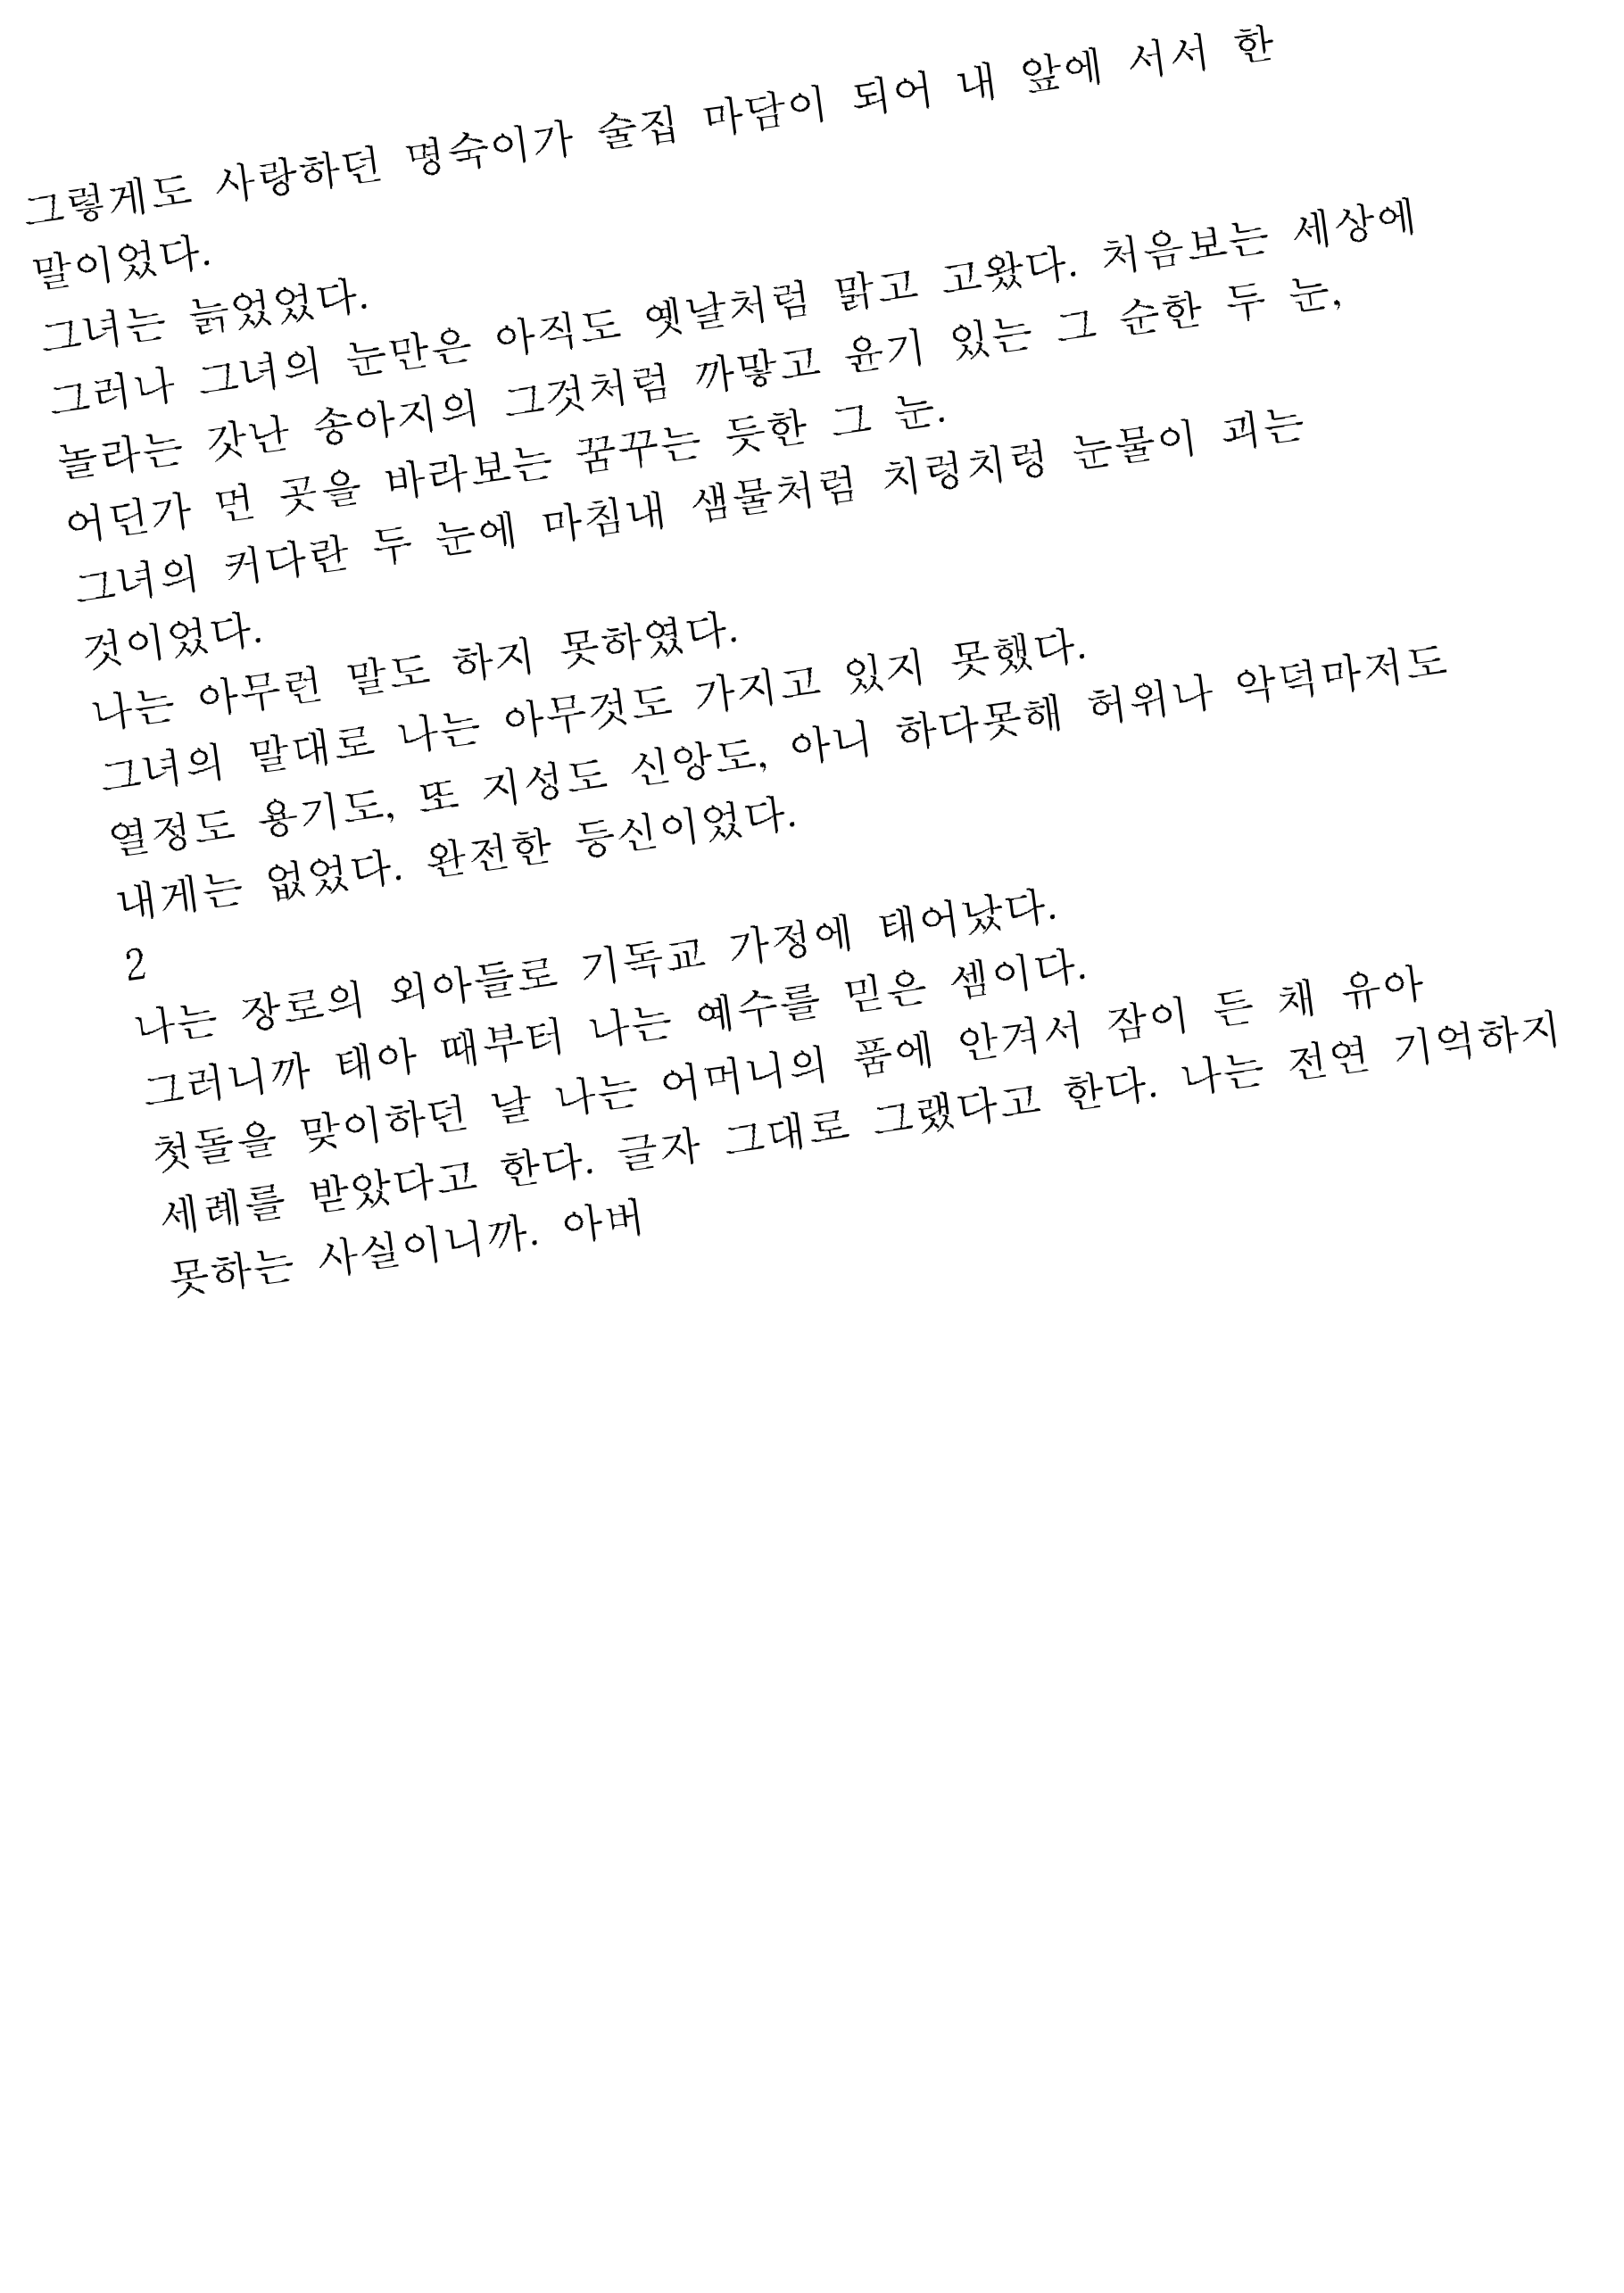

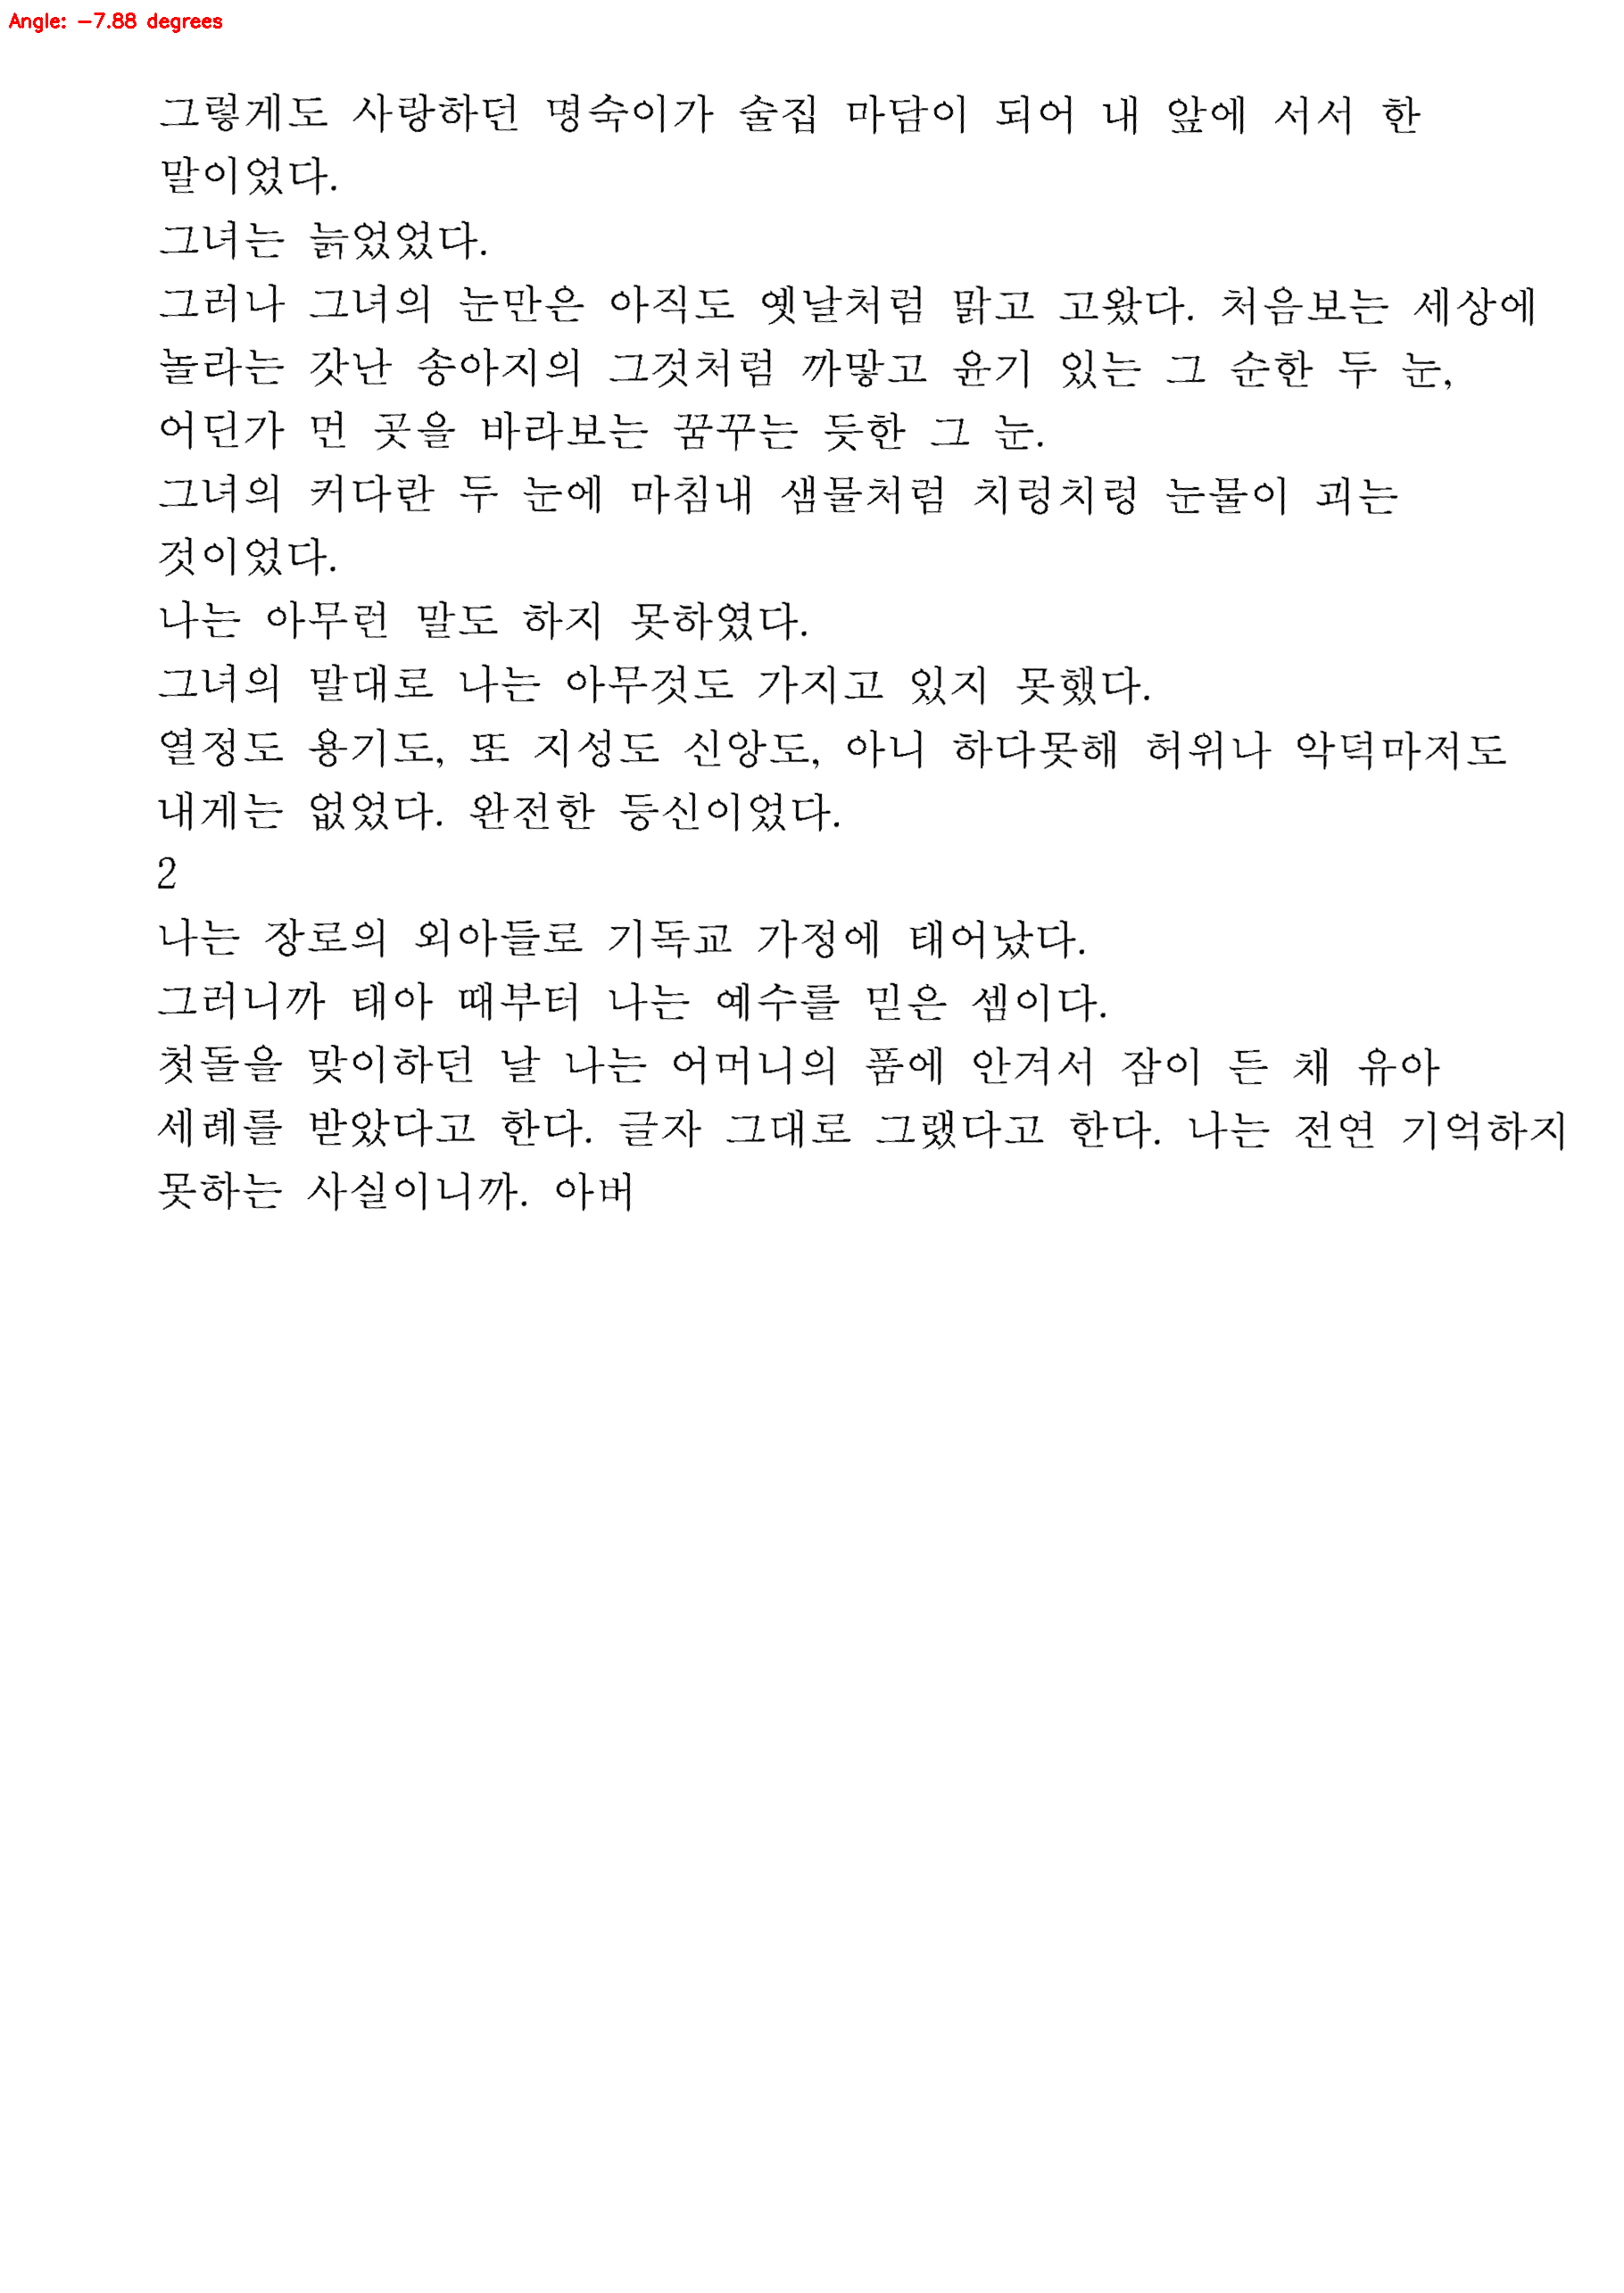

AttributeError: ignored

In [4]:
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

def skew_correction(image_path):
  image = cv2.imread(image_path)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.bitwise_not(gray)

  thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]



  coords = np.column_stack(np.where(thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]

  if angle < -45:
    angle = -(90 + angle)
      
  else:
    angle = -angle

  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h),
    flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
      
  cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
  
  # colab에서 실행하는 경우
  cv2_imshow(image)
  cv2_imshow(rotated)

  # local environment에서 실행하는 경우
  # print("[INFO] angle: {:.3f}".format(angle))
  # cv2.imshow("Input", image)
  # cv2.imshow("Rotated", rotated) 
  # cv2.waitKey(0)

skew_correction('/content/drive/MyDrive/text_image.tif')
